# Linear Regression

This is the implementation of a linear regression model that is written by Anish Bhobe for demonstrating linear regression to Machine Learning TIP of 2017. Feel free to modify and play around.

In [1]:
%matplotlib notebook
# Importing the required libraries.
import numpy as np   # Numpy for linear algebra
import matplotlib.pyplot as plt    #For plotting graphs
from time import sleep

### Hypothesis
Hypothesis for the linear regression. Mathematically $\theta$<sup>T</sup>X, but in code, due to each element being a row (Please do this math on paper), we take X$\theta$

In [2]:
def h(X,theta):
    """ h(np.array, np.array)-> np.array
    Returns the hypothesis of the linear regression
    """
    return X@theta

### Cost and Gradient
Cost function for the linear regression, also returns gradient (because it's convenient. No other reason.)<br>
<b>J</b> = (1/2m) $\Sigma$<sub>j</sub> (h<sub>$\theta$</sub>(X<sup>(j)</sup>) - y<sup>(j)</sup>)<sup>2</sup> <br>
<b>Gradient</b> = (1/m) $\Sigma$<sub>i</sub> (h<sub>$\theta$</sub>(X) - y) x<sub>i</sub>

In [3]:
def cost(X,y,theta):
    """ cost(np.array, np.array, np.array)-> (float, np.array)
    Calculates and returns the cost on X and y for the current theta (J)
    Calculates and returns the gradient of cost function (G)
    """
    m = len(y)
    delta = h(X,theta) - y
    J = (0.5/m) * (delta.transpose()@delta)[0,0]
    G = (1/m) * X.transpose()@delta
    return J,G

### Gradient Descent

Vanilla gradient descent<br>
Updates all thetas every epoch. <br>
$\theta$<sub>i</sub> = $\theta$<sub>i</sub> - $\alpha$G<sub>i</sub>

In [4]:
def fit_gd(X,y,alpha,epochs,visual=False):
    """ fit_gd(np.array, np.array, float, int, boolean)-> (np.array, list)
    This function uses gradient descent to update and find the weights (theta)
    and also returns a list of the cost at each epoch.
    X: The input matrix including the bias term
    y: The labels (correct answers)
    alpha: learning rate
    epochs: number of epochs to train for
    visual: Set true for a moving graph (default = False)
    """
    m,n_1 = X.shape
    J_list = []
    theta = np.zeros((n_1,1))
    # theta = np.random.random((n_1,1))
    
    # IGNORE, and DO NOT TOUCH this part of the code This starts a plot
    if(visual):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.ion()
        fig.show()
        fig.canvas.draw()
    # STOP IGNORING.
    
    for i in range(epochs):
        J,G = cost(X,y,theta)    # Get cost and gradient
        J_list.append(J)         # Add the current cost to the list
        theta -= alpha*G         # Update all theta
        # DO NOT TOUCH THIS PART. IT GRAPHS. 
        if (visual):
            ax.clear()
            ax.plot(X[:,1],h(X,theta))
            ax.plot(X[:,1],y)
            plt.title("Epoch %i"%i)
            fig.canvas.draw()
            #sleep(1/epochs)    
        # TOUCHING ALLOWED
    return theta,J_list

### Creating inputs
<b><i> Normally you wont do this. </i></b> <br>
Just taking a linear range so the equation of line is $y = x + 2$ and then adding normal noise with variance 1

In [5]:
N = 1                                        # Number of features
M = 100                                      # Number of data points
x = np.arange(M,dtype=np.float64)            # x = 0 to 99
y = x + 1                                    # y = x + 100
y = y + np.random.normal(0,2,size=y.shape)   # Add normally distributed noise
y = y.reshape((M,1))                         # Convert y from an array to a matrix of size Mx1

# NOTE: This line is called normalization.
# Using this, x values are changed so that the mean is 0 and variance is 1
# Read about normalization and why it's important.
# Also, comment this line and run the entire script again, to see what happens. You might need to change the 
# learning rate and the number of epochs. Set the visuals to True to see it live.
x = (x-x.mean(0))/(x.std(0))                

x = np.column_stack((np.ones((M,1)),x))      # Add the 1's at the start (bias terms)
#x = (x-np.mean(x,0))/np.std(x,0)

In [6]:
# Taking training set (First 70% of data).
# IF you don't understand how it works, read up on python list slicing
xtrain = x[:int(len(x)*0.7),:]
ytrain = y[:len(xtrain),:]

# Taking test set (Last 30%) or (Everything but the first 70%)
xtest = x[int(len(x)*0.7):,:]
ytest = y[len(xtrain):,:]

## Training a model to fit on the training set and getting the theta and the cost list

<IPython.core.display.Javascript object>


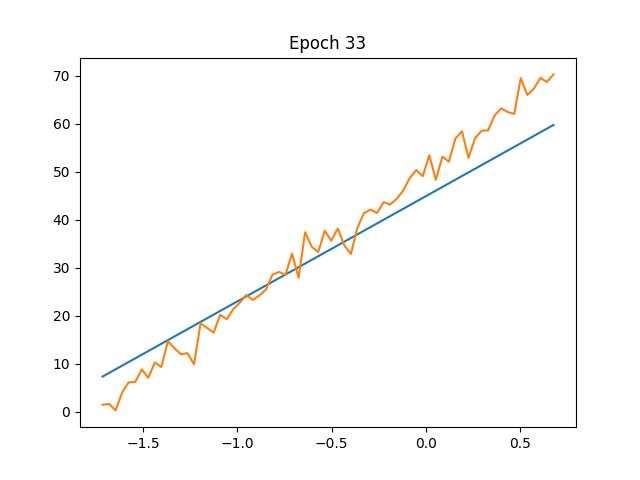

In [ ]:
theta,J_list = fit_gd(xtrain,ytrain,0.15,100,True)     #Set False for epochs > 150

In [ ]:
# Plotting the final line
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
plt.plot(xtrain[:,1:2],h(xtrain,theta))
plt.plot(xtrain[:,1:2],ytrain)
plt.show()

<IPython.core.display.Javascript object>


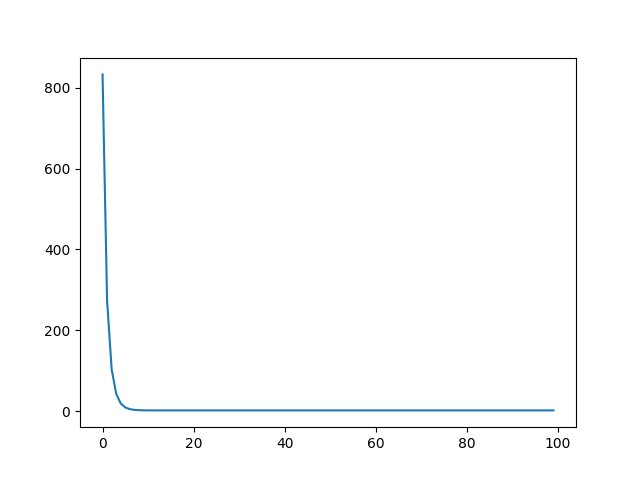

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
plt.plot(J_list)
plt.show()

4.4408920985006263e-18